In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [18]:
#Reading in the data into the DataFrame
X = breast_cancer_data.data
y = breast_cancer_data.target

df = pd.DataFrame(X,columns=breast_cancer_data.feature_names)
df['target'] = y

In [19]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [20]:
df.isnull().sum() #no null

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<Axes: >

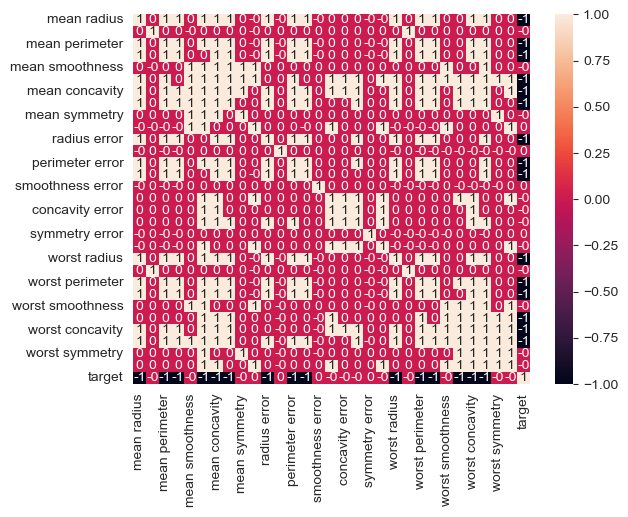

In [21]:
correlation_matrix = df.corr().round()
sns.heatmap(data=correlation_matrix, annot=True)

In [22]:
y = df['target']
X = df.drop('target',axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (569, 30)
y shape: (569,)


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
Y_train shape: (455,)
Y_test shape: (114,)


In [25]:
logistic_model = LogisticRegression(solver="lbfgs",max_iter=10000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [26]:
# Evaluate the model on the testing set
accuracy = logistic_model.score(X_test,y_test)
print(accuracy)

0.956140350877193


In [27]:
# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
print(cv_scores)

[0.95604396 0.95604396 0.96703297 0.96703297 0.92307692]


In [34]:
#model evaluation for training set
y_train_predict = logistic_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train,y_train_predict)
print("The model performance for the training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = logistic_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2 = r2_score(y_test,y_test_predict)
print("The model performance for the training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for the training set
--------------------------------------
RMSE is 0.19889806323953876
R2 score is 0.830554061323292


The model performance for the training set
--------------------------------------
RMSE is 0.20942695414584775
R2 score is 0.8132983950212905


